In [296]:
import pandas as pd
import numpy as np

In [297]:

dataframe_train = pd.read_csv("./train.csv")
dataframe_test = pd.read_csv("./test.csv")


In [298]:
dataframe_train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [299]:
df = pd.read_csv("./gender_submission.csv")
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [300]:
print(dataframe_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [301]:
print(dataframe_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [302]:
embarked_missing_idx = dataframe_train[dataframe_train['Embarked'].isnull()].index
for idx in embarked_missing_idx:
    print(dataframe_train.iloc[max(idx-5, 0):idx+6])

    PassengerId  Survived  Pclass                                Name     Sex  \
56           57         1       2                   Rugg, Miss. Emily  female   
57           58         0       3                 Novel, Mr. Mansouer    male   
58           59         1       2        West, Miss. Constance Mirium  female   
59           60         0       3  Goodwin, Master. William Frederick    male   
60           61         0       3               Sirayanian, Mr. Orsen    male   
61           62         1       1                 Icard, Miss. Amelie  female   
62           63         0       1         Harris, Mr. Henry Birkhardt    male   
63           64         0       3               Skoog, Master. Harald    male   
64           65         0       1               Stewart, Mr. Albert A    male   
65           66         1       3            Moubarek, Master. Gerios    male   
66           67         1       2        Nye, Mrs. (Elizabeth Ramell)  female   

     Age  SibSp  Parch     

In [303]:
dataframe_train[dataframe_train.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [304]:

missing_columns = dataframe_train.columns[dataframe_train.isnull().any()]
print(missing_columns.tolist())

['Age', 'Cabin', 'Embarked']


In [365]:
dataframe_train[dataframe_train['Embarked'].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,freq_Q,freq_R,freq_S,freq_T,freq_U,freq_V,freq_W,freq_X,freq_Y,freq_Z
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,...,0.0,0.090909,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,...,0.0,0.058824,0.117647,0.058824,0.0,0.0,0.0,0.0,0.0,0.0


In [366]:
dataframe_train['Embarked'] = dataframe_train['Embarked'].fillna('S')

In [367]:
missing_columns = dataframe_train.columns[dataframe_train.isnull().any()]
print(missing_columns.tolist())

['Age', 'Cabin']


In [305]:
male_survived = dataframe_train[(dataframe_train['Survived'] == 1) & (dataframe_train['Sex'] == 'male')].shape[0]
female_survived = dataframe_train[(dataframe_train['Survived'] == 1) & (dataframe_train['Sex'] == 'female')].shape[0]
print(f"surviving male: {male_survived}, surviving female: {female_survived}")

surviving male: 109, surviving female: 233


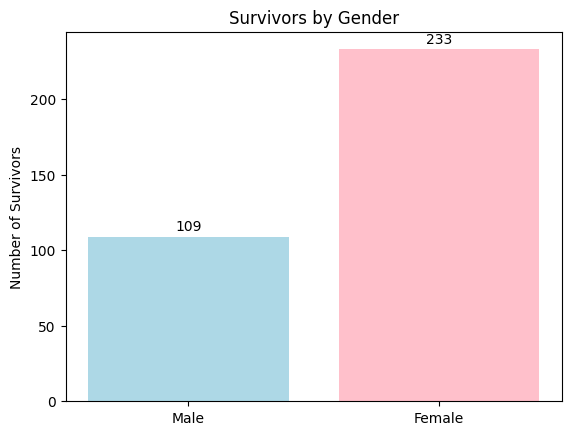

In [306]:
import matplotlib.pyplot as plt

for i, v in enumerate([male_survived, female_survived]):
    plt.text(i, v + 2, str(v), ha='center', va='bottom')

plt.bar(['Male', 'Female'], [male_survived, female_survived], color=['lightblue', 'pink'])
plt.ylabel('Number of Survivors')
plt.title('Survivors by Gender')
plt.show()

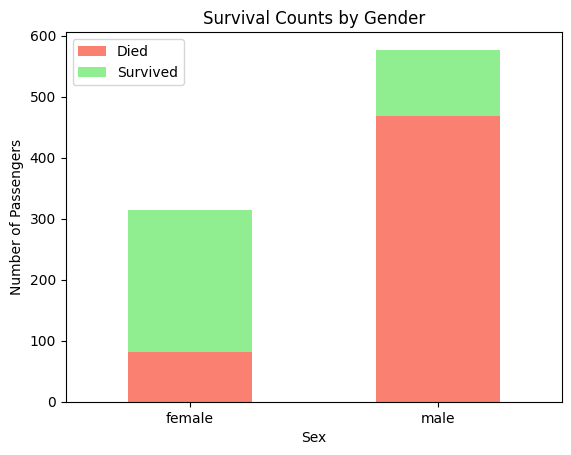

In [307]:
survived_counts = dataframe_train.groupby(['Sex', 'Survived']).size().unstack()
survived_counts.plot(kind='bar', stacked=True, color=['salmon', 'lightgreen'])
plt.ylabel('Number of Passengers')
plt.title('Survival Counts by Gender')
plt.xticks(rotation=0)
plt.legend(['Died', 'Survived'])
plt.show()

In [308]:
total_passengers = dataframe_train.shape
print(f"Total: {total_passengers} passengers")

Total: (891, 12) passengers


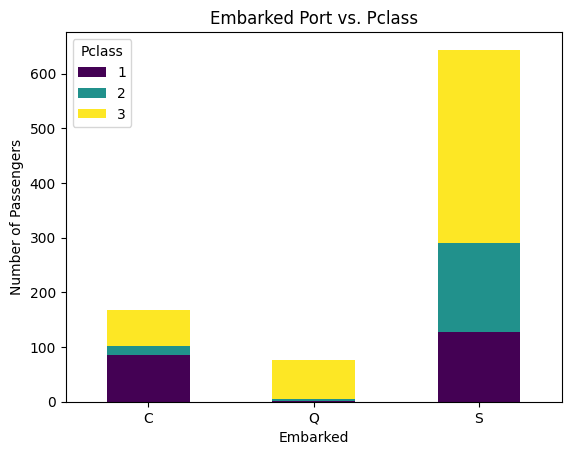

In [309]:
embarked_pclass_counts = dataframe_train.groupby(['Embarked', 'Pclass']).size().unstack()
embarked_pclass_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.ylabel('Number of Passengers')
plt.title('Embarked Port vs. Pclass')
plt.xticks(rotation=0)
plt.legend(title='Pclass')
plt.show()

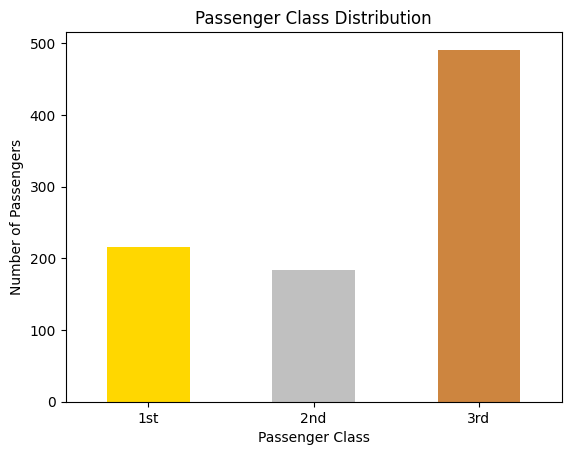

In [310]:
pclass_counts = dataframe_train['Pclass'].value_counts().sort_index()
pclass_counts.plot(kind='bar', color=['gold', 'silver', 'peru'])
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.title('Passenger Class Distribution')
plt.xticks([0, 1, 2], ['1st', '2nd', '3rd'], rotation=0)
plt.show()


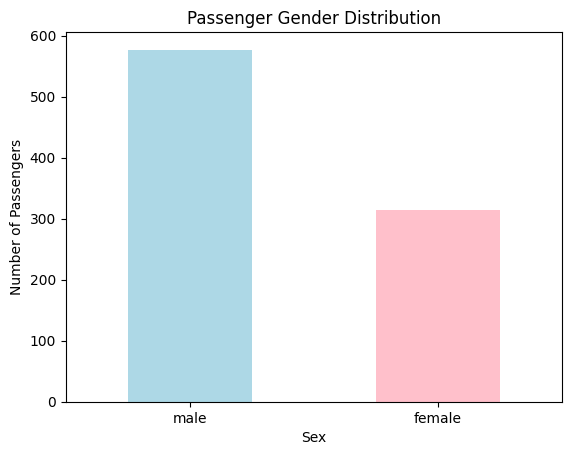

In [311]:
sex_counts = dataframe_train['Sex'].value_counts()
sex_counts.plot(kind='bar', color=['lightblue', 'pink'])
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.title('Passenger Gender Distribution')
plt.xticks(rotation=0)
plt.show()

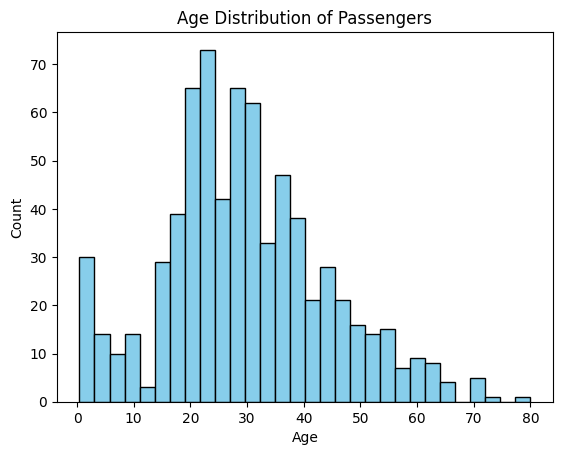

In [312]:
dataframe_train['Age'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Passengers')
plt.show()

0                       Braund, Mr. Owen Harris
1                    Cumings, Mrs. John Bradley
2                        Heikkinen, Miss. Laina
3                  Futrelle, Mrs. Jacques Heath
4                      Allen, Mr. William Henry
                         ...                   
886                       Montvila, Rev. Juozas
887                Graham, Miss. Margaret Edith
888    Johnston, Miss. Catherine Helen "Carrie"
889                       Behr, Mr. Karl Howell
890                         Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object
0                       Braund, Mr. Owen Harris
1                    Cumings, Mrs. John Bradley
2                        Heikkinen, Miss. Laina
3                  Futrelle, Mrs. Jacques Heath
4                      Allen, Mr. William Henry
                         ...                   
886                       Montvila, Rev. Juozas
887                Graham, Miss. Margaret Edith
888    Johnston, Miss. Catherine Helen "Carrie"
8

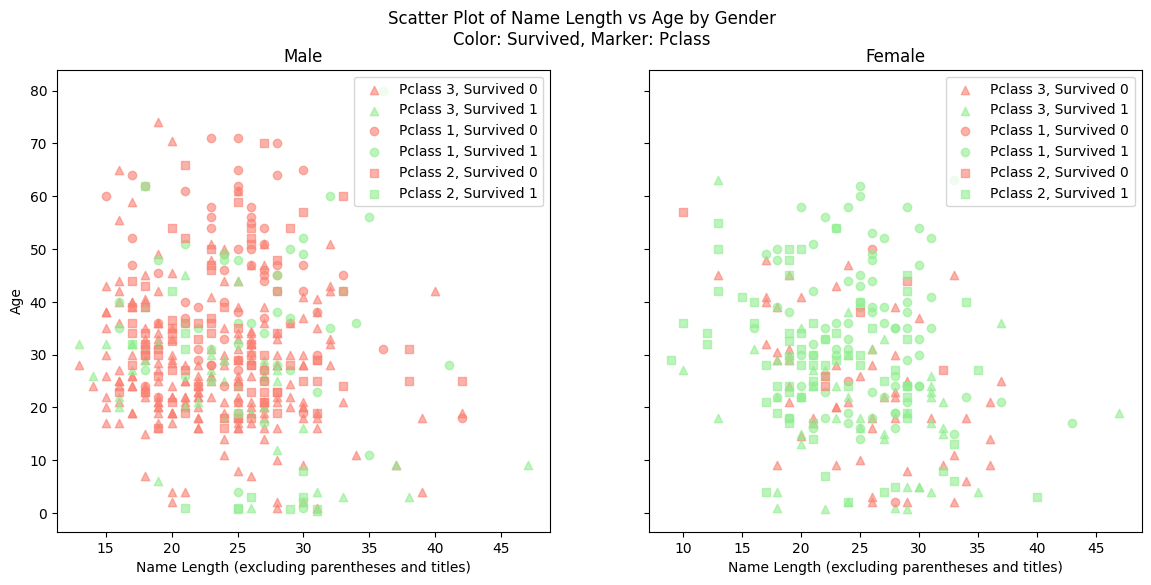

In [313]:
import re

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# 颜色区分是否获救
survived_colors = {0: 'salmon', 1: 'lightgreen'}
# 图形标记区分Pclass
pclass_markers = {1: 'o', 2: 's', 3: '^'}

for idx, sex in enumerate(['male', 'female']):
    ax = axes[idx]
    for pclass in dataframe_train['Pclass'].unique():
        for survived in dataframe_train['Survived'].unique():
            mask = (
                (dataframe_train['Sex'] == sex) &
                (dataframe_train['Pclass'] == pclass) &
                (dataframe_train['Survived'] == survived)
            )
            ax.scatter(
                name_lengths[mask],
                dataframe_train.loc[mask, 'Age'],
                alpha=0.6,
                c=survived_colors[survived],
                marker=pclass_markers[pclass],
                label=f"Pclass {pclass}, Survived {survived}"
            )
    # 统计名字长度时不包含括号内内容，并去除称谓
    def clean_name(name):
        # 去除括号及括号内内容
        name = re.sub(r"\s*\(.*?\)", "", name)
        # 去除称谓
        name = re.sub(r"\b(Mr\.|Mrs\.|Miss\.|Ms\.|Master\.|Rev\.|Dr\.|Col\.|Major\.|Capt\.|Sir\.|Don\.|Jonkheer\.|Lady\.|Countess\.|Mme\.|Mlle\.|Dona\.)\b", "", name)
        # 去除多余空格
        name = name.strip()
        return name

    cleaned_names = dataframe_train['Name'].apply(clean_name)
    print(cleaned_names)
    name_lengths = cleaned_names.str.len()
    ax.set_xlabel('Name Length (excluding parentheses and titles)')
    ax.set_title(f'{sex.capitalize()}')
    ax.legend()

axes[0].set_ylabel('Age')
fig.suptitle('Scatter Plot of Name Length vs Age by Gender\nColor: Survived, Marker: Pclass')
plt.show()

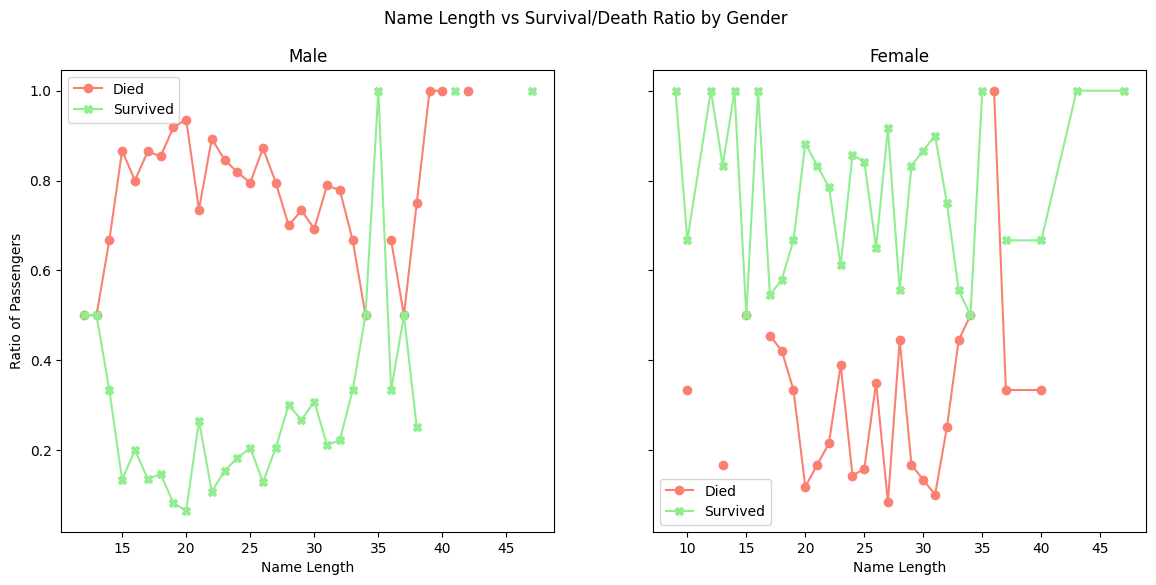

In [314]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for idx, sex in enumerate(['male', 'female']):
    ax = axes[idx]
    for survived in [0, 1]:
        mask = (dataframe_train['Sex'] == sex) & (dataframe_train['Survived'] == survived)
        counts = dataframe_train[mask].groupby(name_lengths[mask]).size()
        total_counts = dataframe_train[dataframe_train['Sex'] == sex].groupby(name_lengths[dataframe_train['Sex'] == sex]).size()
        ratio = counts / total_counts
        ax.plot(ratio.index, ratio.values, label=f"{'Survived' if survived else 'Died'}", 
                marker=survived_markers[survived], color=survived_colors[survived])
    ax.set_xlabel('Name Length')
    ax.set_title(f"{sex.capitalize()}")
    ax.legend()

axes[0].set_ylabel('Ratio of Passengers')
fig.suptitle('Name Length vs Survival/Death Ratio by Gender')
plt.show()

In [315]:
print(dataframe_train['Name'])

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object


In [316]:
min_length = name_lengths.min()
max_length = name_lengths.max()


print(dataframe_train[name_lengths == min_length])
print(dataframe_train[name_lengths == max_length])

    PassengerId  Survived  Pclass                          Name     Sex   Age  \
66           67         1       2  Nye, Mrs. (Elizabeth Ramell)  female  29.0   

    SibSp  Parch      Ticket  Fare Cabin Embarked  
66      0      0  C.A. 29395  10.5   F33        S  
     PassengerId  Survived  Pclass  \
165          166         1       3   
192          193         1       3   

                                                Name     Sex   Age  SibSp  \
165  Goldsmith, Master. Frank John William "Frankie"    male   9.0      0   
192  Andersen-Jensen, Miss. Carla Christine Nielsine  female  19.0      1   

     Parch  Ticket     Fare Cabin Embarked  
165      2  363291  20.5250   NaN        S  
192      0  350046   7.8542   NaN        S  


In [317]:
# Counting the frequency of all the characters in a passenger's name, to predict whether she/he has been survived or not.

# 1, split the Name column with ', . "" ()' into array
# 2, save index 0 as family name
# 3, save index 2 as given name
# 4, save index 1 as title
# 5, save the rest as extra info

In [318]:
def process_name(name):
    # Remove any extra whitespace
    name = name.strip()
    
    # Split with comma first to separate family name
    parts = name.split(',', 1)
    family_name = parts[0].strip()
    
    remaining = parts[1].strip() if len(parts) > 1 else ""
    
    # Initialize variables
    title = ""
    given_name = ""
    extra_info = ""
    
    # Extract content within parentheses as extra info
    import re
    extra_info_match = re.findall(r'\((.*?)\)', remaining)
    if extra_info_match:
        extra_info = extra_info_match[0]
        # Remove the parentheses part from remaining
        remaining = re.sub(r'\s*\(.*?\)', '', remaining)
    
    # Split the remaining parts by dots
    parts = [p.strip() for p in remaining.split('.') if p.strip()]
    
    if len(parts) > 0:
        title = parts[0]  # The first part is typically the title
    
    if len(parts) > 1:
        # Join the rest as given name, excluding empty strings
        given_name = ' '.join([p for p in parts[1:] if p])
    
    return pd.Series({
        'family_name': family_name,
        'title': title,
        'given_name': given_name,
        'extra_info': extra_info
    })

# Apply the function to the Name column
name_components = dataframe_train['Name'].apply(process_name)

# Add new columns to the dataframe
dataframe_train = pd.concat([dataframe_train, name_components], axis=1)

# Display a few examples to verify the results
print("Sample results:")
print(dataframe_train[['Name', 'family_name', 'title', 'given_name', 'extra_info']].head())

Sample results:
                                                Name family_name title  \
0                            Braund, Mr. Owen Harris      Braund    Mr   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...     Cumings   Mrs   
2                             Heikkinen, Miss. Laina   Heikkinen  Miss   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    Futrelle   Mrs   
4                           Allen, Mr. William Henry       Allen    Mr   

      given_name              extra_info  
0    Owen Harris                          
1   John Bradley  Florence Briggs Thayer  
2          Laina                          
3  Jacques Heath           Lily May Peel  
4  William Henry                          


In [319]:
dataframe_train.to_csv('splited_data.csv')

In [320]:
# combine family name and given name as name string
# count the present times of letter A to Z, and divided by the length of the name string
# save the values into an 1D array
# loop the steps above to all name strings
# save the values into a 2D array

In [321]:
def analyze_name_letters(row):
    # Combine family name and given name
    full_name = (str(row['family_name']) + ' ' + str(row['given_name'])).upper()
    
    # Remove any non-alphabetic characters and spaces
    full_name = ''.join(c for c in full_name if c.isalpha())
    
    # Get the length of the name for calculating frequencies and avoid division by zero
    name_length = len(full_name) if len(full_name) > 0 else 1 
    
    # Initialize array for A-Z (26 letters)
    letter_frequencies = []
    
    # Count frequency of each letter A-Z
    for letter in range(ord('A'), ord('Z') + 1):
        count = full_name.count(chr(letter))
        frequency = count / name_length
        letter_frequencies.append(frequency)
    
    return letter_frequencies

# Create a 2D array with letter frequencies for all passengers
name_letter_frequencies = np.array([analyze_name_letters(row) for _, row in dataframe_train.iterrows()])

# Create column names for better visualization
letter_columns = [f'freq_{chr(i)}' for i in range(ord('A'), ord('Z') + 1)]

# Convert to DataFrame for easier viewing
letter_frequencies_df = pd.DataFrame(name_letter_frequencies, columns=letter_columns)

# Add the new features to the main dataframe
dataframe_train = pd.concat([dataframe_train, letter_frequencies_df], axis=1)

# Display sample results
print("Shape of letter frequencies array:", name_letter_frequencies.shape)
print("\nSample of letter frequencies for first 5 passengers:")
print(letter_frequencies_df.head())

# Display average letter frequencies across all names
print("\nAverage letter frequencies across all names:")
print(letter_frequencies_df.mean().sort_values(ascending=False).head(10))

Shape of letter frequencies array: (891, 26)

Sample of letter frequencies for first 5 passengers:
     freq_A    freq_B    freq_C    freq_D    freq_E  freq_F    freq_G  \
0  0.125000  0.062500  0.000000  0.062500  0.062500    0.00  0.000000   
1  0.055556  0.055556  0.055556  0.055556  0.055556    0.00  0.055556   
2  0.142857  0.000000  0.000000  0.000000  0.142857    0.00  0.000000   
3  0.100000  0.000000  0.050000  0.000000  0.200000    0.05  0.000000   
4  0.117647  0.000000  0.000000  0.000000  0.117647    0.00  0.000000   

     freq_H    freq_I    freq_J  ...  freq_Q    freq_R    freq_S  freq_T  \
0  0.062500  0.062500  0.000000  ...    0.00  0.187500  0.062500     0.0   
1  0.055556  0.055556  0.055556  ...    0.00  0.055556  0.055556     0.0   
2  0.071429  0.214286  0.000000  ...    0.00  0.000000  0.000000     0.0   
3  0.100000  0.000000  0.050000  ...    0.05  0.050000  0.050000     0.1   
4  0.058824  0.117647  0.000000  ...    0.00  0.058824  0.000000     0.0   

     

In [ ]:
name_components_test = dataframe_test['Name'].apply(process_name)
dataframe_test = pd.concat([dataframe_test, name_components_test], axis=1)


name_letter_frequencies_test = np.array([analyze_name_letters(row) for _, row in dataframe_test.iterrows()])
letter_frequencies_test_df = pd.DataFrame(name_letter_frequencies_test, columns=letter_columns)
dataframe_test = pd.concat([dataframe_test, letter_frequencies_test_df], axis=1)

In [323]:
dataframe_train.to_csv('frequence_data.csv')

In [324]:
# visualize the letter_frequencies_df
name_letter_frequencies

array([[0.125     , 0.0625    , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05555556, 0.05555556, 0.05555556, ..., 0.        , 0.05555556,
        0.        ],
       [0.14285714, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.07142857, 0.        , 0.07142857, ..., 0.        , 0.        ,
        0.        ],
       [0.07142857, 0.07142857, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.07692308, 0.        , 0.07692308, ..., 0.        , 0.07692308,
        0.        ]])

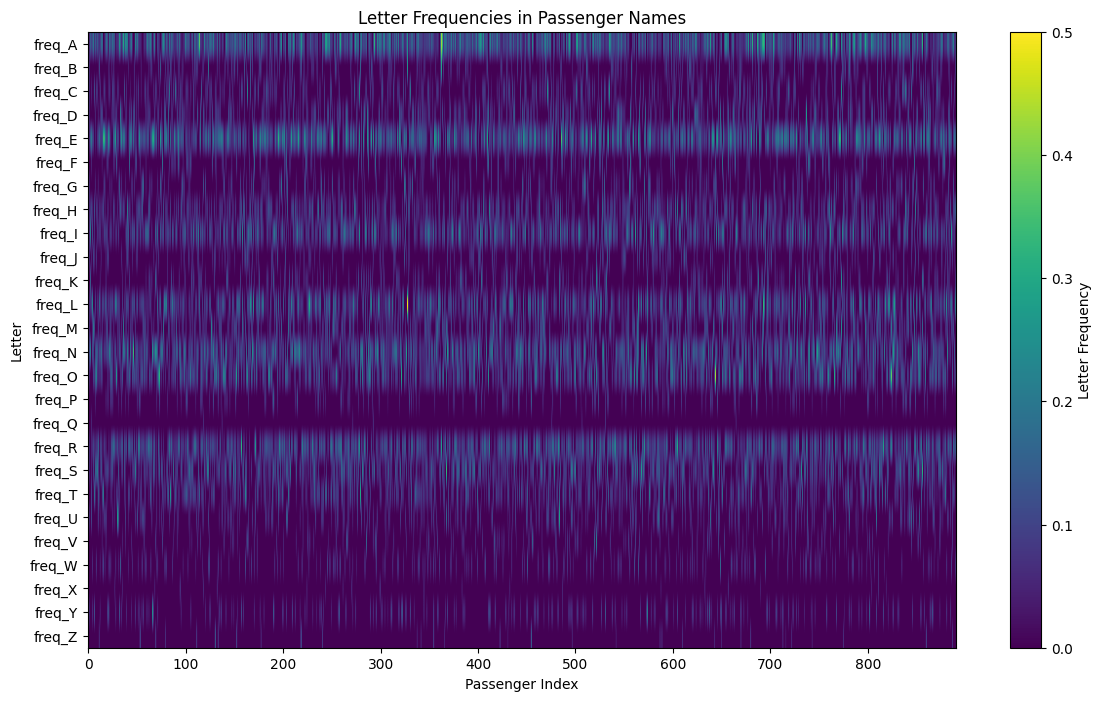

In [325]:
plt.figure(figsize=(14, 8))
plt.imshow(letter_frequencies_df.T, aspect='auto', cmap='viridis')
plt.colorbar(label='Letter Frequency')
plt.yticks(ticks=range(len(letter_columns)), labels=letter_columns)
plt.xlabel('Passenger Index')
plt.ylabel('Letter')
plt.title('Letter Frequencies in Passenger Names')
plt.show()

In [326]:
# build KNN

In [363]:
import keras

model = keras.Sequential(
    [
        keras.layers.Dense(2, input_shape=(26,), activation="softmax"),
    ]
)

model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(name_letter_frequencies, dataframe_train['Survived'], epochs=25)

Epoch 1/25


/opt/conda/envs/ml/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6186 - loss: 0.6812  
Epoch 2/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6224 - loss: 0.6779 
Epoch 3/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.6120 - loss: 0.6729
Epoch 4/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 0.5981 - loss: 0.6775
Epoch 5/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - accuracy: 0.6067 - loss: 0.6731
Epoch 6/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.6328 - loss: 0.6603
Epoch 7/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.6295 - loss: 0.6625
Epoch 8/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 0.5831 - loss: 0.6762
Epoch 9/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - accuracy: 0.6366 - loss: 0.6583
Epoch 10/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.6228 - loss: 0.6628
Epoch 11/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.5980 - loss: 0.6713
Epoch 12/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy:

In [ ]:
# Predict survival using the trained model
predictions = model.predict(name_letter_frequencies_test)

# unsurvived predictions is always more than 0.5, so have to ajust threshold.
predicted_labels = (predictions[:, 1] > 0.42).astype(int)

# Compare predictions to actual values and calculate accuracy
actual_labels = df.set_index('PassengerId').loc[dataframe_test['PassengerId'], 'Survived'].values
accuracy = np.mean(predicted_labels == actual_labels)
print(f"Accuracy: {accuracy:.4f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Accuracy: 0.6268


Conclusion and Future Work

The design direction of this project is to predict survival or death by statistically analyzing the frequency of letters in passenger names. Through the analysis and modeling of Titanic passenger data, this project achieved a superficial prediction accuracy of over 60%, but in reality, the model did not learn effective prediction patterns. Future improvements can be made in the following aspects:


    1 Introduce more effective feature engineering methods
    2 Try other more suitable machine learning algorithms
    3 Conduct more in-depth data exploration and analysis
    4 Optimize model parameters and structure


The failure of metaphysical theoretical exploration:(